In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_new=np.array([[0],[2]])
x_new.shape

(2, 1)

In [3]:
x_new_b=np.c_[np.ones((2,1)),x_new]
x_new_b

array([[1., 0.],
       [1., 2.]])

In [4]:
theta_best=[[4.21509616],[ 2.77011339]]

In [5]:
y_predic=x_new_b.dot(theta_best)
y_predic

array([[4.21509616],
       [9.75532294]])

In [6]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x+ np.random.randn(100, 1)

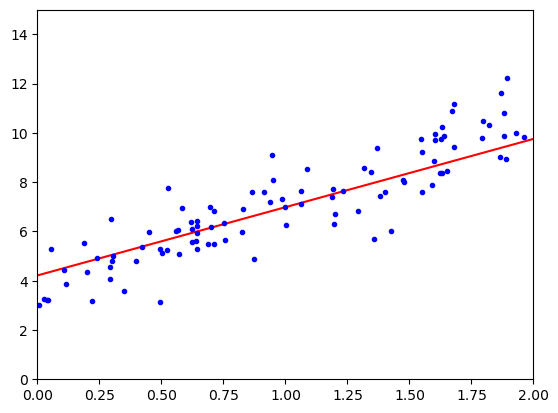

In [7]:
plt.plot(x_new,y_predic,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression 
lin_reg=LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.71240941]), array([[3.38122848]]))

In [9]:
lin_reg.predict(x_new)

array([[ 3.71240941],
       [10.47486638]])

In [10]:
theta=np.random.randn(2,1)
theta

array([[ 0.13698879],
       [-1.13475272]])

In [11]:
y.ravel()

array([ 5.27639986,  9.88271187,  9.03590223, 10.32438396,  8.09845913,
        9.7679519 ,  5.1293971 ,  8.9319043 ,  8.39008113,  9.820448  ,
        6.70702293,  8.45851671,  4.05125864,  5.56922193,  6.29143627,
        9.97292683,  6.49686613,  5.94465439,  6.98817258,  3.87672601,
        4.43345438,  7.61082619,  8.5932905 ,  7.618244  , 10.87742063,
        3.2454106 ,  7.62114765,  3.02361365,  4.86304697,  7.64295052,
       12.22344466,  5.96144147,  4.78682391, 10.00528083,  7.77200595,
        9.08386253, 10.81194141,  8.07364151,  8.5394969 ,  5.63441727,
        5.68157207,  3.58905421,  5.0995845 ,  6.38556292,  3.13951546,
        7.88788614,  8.39461264,  7.10849965,  5.96142337,  6.19698547,
       11.6102601 ,  4.36230867,  4.80502913,  9.88965436,  3.17501551,
        6.90053086, 10.49862485,  3.2092048 ,  9.24059448,  5.61070576,
        6.35760457,  9.80011719,  7.71850131,  7.60123242,  9.43430402,
        3.20785097,  7.29947056,  8.84688324,  7.99066567,  6.40

In [12]:
from sklearn.linear_model import SGDRegressor
sgdr=SGDRegressor(penalty=None,eta0=0.1)
sgdr.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [13]:
sgdr.intercept_,sgdr.coef_

(array([3.79353336]), array([3.45887261]))

# this is the polynomial 

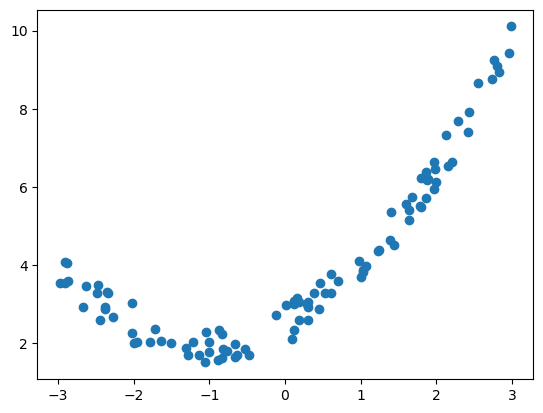

In [14]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)
plt.scatter(x,y);

In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)

In [16]:
x_poly=poly_features.fit_transform(x)

In [17]:
x_poly[0]

array([-2.62868989,  6.91001053])

In [18]:
x[0]

array([-2.62868989])

In [19]:
x[1]

array([1.03244025])

In [20]:
x_poly[1]

array([1.03244025, 1.06593287])

# lets do something else

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [22]:
def plot_disnuts(model,x,y):
    x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2)
    train_error,val_error=[],[]
    for m in range(1,len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict=model.predict(x_train[:m])
        y_val_predict=model.predict(x_val)
        train_error.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_error.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_error),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_error),"b-",linewidth=3,label="vali")


In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
line_reg=LinearRegression()

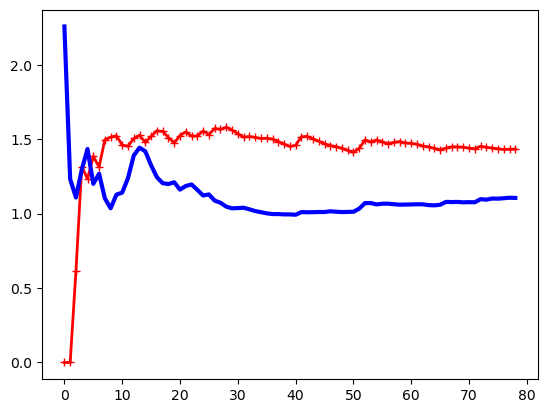

In [25]:
plot_disnuts(line_reg,x,y)

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
from sklearn.pipeline import Pipeline 
polynomial_regression=Pipeline((
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("sgd_reg",LinearRegression())
))

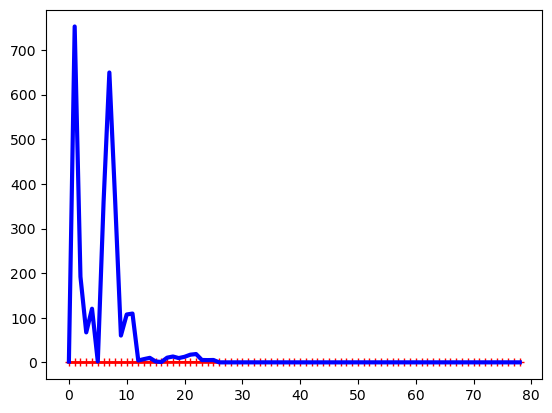

In [28]:
plot_disnuts(polynomial_regression,x,y)

# this is the regularized form of regression

In [31]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)
from sklearn.linear_model import Ridge
ridge_reg=Ridge(alpha=1,solver="cholesky")
ridge_reg.fit(x,y)
ridge_reg.predict([[1.5]])

array([[5.41949315]])

In [34]:
#using stochastic gradient decent
from sklearn.linear_model import SGDRegressor
sgr=SGDRegressor(penalty="l2")
sgr.fit(x,y)
#predict
sgr.predict([[1.5]])

C:\Users\dread-miles\miniconda3\envs\snaky\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5.39125419])

In [35]:
from sklearn.linear_model import Lasso
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.rand(m,1)
laso=Lasso(alpha=0.1)
laso.fit(x,y)
#predict
laso.predict([[1.5]])

array([5.46759634])

In [36]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.4,l1_ratio=0.5)
elastic.fit(x,y)
#predict
elastic.predict([[1.5]])

array([5.348364])

In [47]:
#logistic regress
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [55]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [56]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
#preprocess the data
x=iris["data"][:,3:]
y=(iris["target"]==2).astype(int)

In [73]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
#lets create the classifier
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
lgr.fit(x,y)

LogisticRegression()

In [76]:
x_new=np.linspace(0,3,1000).reshape(-1,1)
y_prob=lgr.predict_proba(x_new)

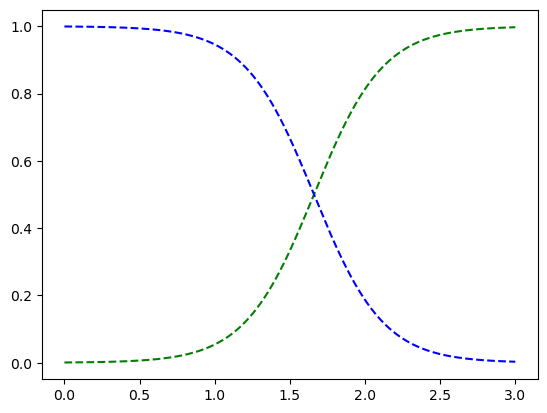

In [77]:
plt.plot(x_new,y_prob[:,1],"g--",label="iris-virginica")
plt.plot(x_new,y_prob[:,0],"b--",label="not-virginica")